# Analisis World Happiness
## Kelompok 1
|Nama|NIM|
|:-:|:-:|
|Muhammad Zamroni|16721038|
|Billy Christianto|16721048|
|Afifah Anugrayni|16721233|
|Carlios Eryan|16721253|


## Dataset yang digunakan:
World Happiness [(sumber)](https://www.kaggle.com/unsdsn/world-happiness)
> Format: CSV 
> 
> Ukuran file: 16.6 kB 
> 
> Dimensi: 158 baris x 12 kolom
>
> Deskripsi:

## Semua data ini kami dapatkan dari website Kaggle
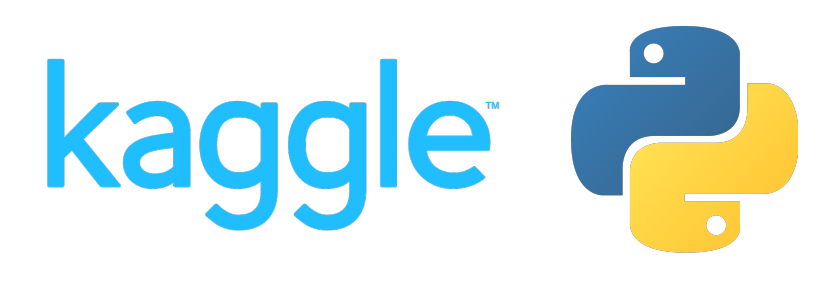



# A. Pendahuluan

****

## Import library yang akan digunakan

In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import seaborn as sns

## Membaca Data

In [501]:
dfW = pd.read_csv("./world_happiness2015.csv")

# B. Deskripsi Data dan File
****

## Deskripsi Data

World Happiness [(sumber)](https://www.kaggle.com/unsdsn/world-happiness)
> Format: CSV 
> 
> Ukuran file: 16.6 kB 
> 
> Dimensi: 158 baris x 12 kolom

In [502]:
print(f"Dimensi data world happiness tahun 2015: {dfW.shape[0]} baris x {dfW.shape[1]} kolom")

Dimensi data world happiness tahun 2015: 158 baris x 12 kolom


# C. Karakteristik Data
****

## Nama Kolom:

In [503]:
dfW.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

## Rename Kolom

In [504]:
dfW.rename(columns = {"Happiness Rank":"Happiness_rank",
                      "Happiness Score":"Happiness_score",
                      "Standard Error":"Standard_error",
                      "Economy (GDP per Capita)":"Economy(GDP_per_capita)",
                      "Health (Life Expectancy)":"Health(Life_expectancy)",
                      "Trust (Government Corruption)":"Trust(Goverment_corruption)",
                      "Dystopia Residual":"Dystopia_residual"}, inplace = True)

In [505]:
dfW.columns

Index(['Country', 'Region', 'Happiness_rank', 'Happiness_score',
       'Standard_error', 'Economy(GDP_per_capita)', 'Family',
       'Health(Life_expectancy)', 'Freedom', 'Trust(Goverment_corruption)',
       'Generosity', 'Dystopia_residual'],
      dtype='object')

## Tipe data

In [506]:
dfW.dtypes

Country                         object
Region                          object
Happiness_rank                   int64
Happiness_score                float64
Standard_error                 float64
Economy(GDP_per_capita)        float64
Family                         float64
Health(Life_expectancy)        float64
Freedom                        float64
Trust(Goverment_corruption)    float64
Generosity                     float64
Dystopia_residual              float64
dtype: object

#### Penjelasan Kolom:
1. Country : Nama negara
2. Region : Wilayah tempat negara tersebut berada
3. Happiness Rank : Peringkat negara berdasarkan Happiness Score
4. Happiness Score : Penilaian skala kebahagiaan hingga skala 10 
5. Standard Error : Standar kesalahan dari Happiness Score
6. Economy (GDP per Capita) : Seberapa jauh Produk Domestik Bruto berpengaruh terhadap Happiness Score
7. Family : Seberapa jauh keluarga berpengaruh terhadap Happiness Score
8. Health (Life Expectancy) : Seberapa jauh harapan hidup berpengaruh terhadap Happiness Score
9. Freedom : Seberapa jauh kebebasan berpengaruh terhadap Happiness Score
10. Trust (Government Corruption) : Seberapa jauh persepsi akan tingkat korupsi berpengaruh terhadap Happiness Score
11. Generosity : Seberapa jauh kebaikan sesama berpengaruh terhadap Happiness Score
12. Dystopia Residual : Seberapa jauh Dystopia Residual (skor dibandingkan dengan negara fiktif yang paling tidak bahagia) berpengaruh terhadap Happiness Score

#### Jenis Data:
- Categorical-Nominal: Country, Region
- Quantitative-Discrete: Happiness Rank
- Qualitative-Continues: Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual

# D. Data Cleaning
****

### Jumlah data yang kosong untuk tiap kolom data world happiness 2015

In [507]:
print("\033[1m{:30}{:20}{:15}{:<15}\033[0m".format("Nama Kolom", "Jumlah Data Kosong", "Jumlah Data", "Persentase Kosong"))
for i in range(len(dfW.columns)):
    persentase = dfW[dfW.columns[i]].isna().sum()/len(dfW[dfW.columns[i]])*100
    Nama = dfW.columns[i].replace(" ", "")
    dK = dfW[dfW.columns[i]].isna().sum()
    jD = len(dfW[dfW.columns[i]])
    persentase = dK/jD*100
    print("{:<30}{:<20}{:<15}{:.2f}%".format(Nama, dK, jD, persentase))


Nama Kolom                    Jumlah Data Kosong  Jumlah Data    Persentase Kosong
Country                       0                   158            0.00%
Region                        0                   158            0.00%
Happiness_rank                0                   158            0.00%
Happiness_score               0                   158            0.00%
Standard_error                0                   158            0.00%
Economy(GDP_per_capita)       0                   158            0.00%
Family                        0                   158            0.00%
Health(Life_expectancy)       0                   158            0.00%
Freedom                       0                   158            0.00%
Trust(Goverment_corruption)   0                   158            0.00%
Generosity                    0                   158            0.00%
Dystopia_residual             0                   158            0.00%


### Tidak ada data world happiness yang kosong, maka dilanjutkan ke tahap selanjutnya yaitu mencari outliers

### Menghapus Outliers (Data yang Berbeda Jauh dengan Lainnya)

#### Menggunakan plot kotak (box plot) untuk mencari outliers

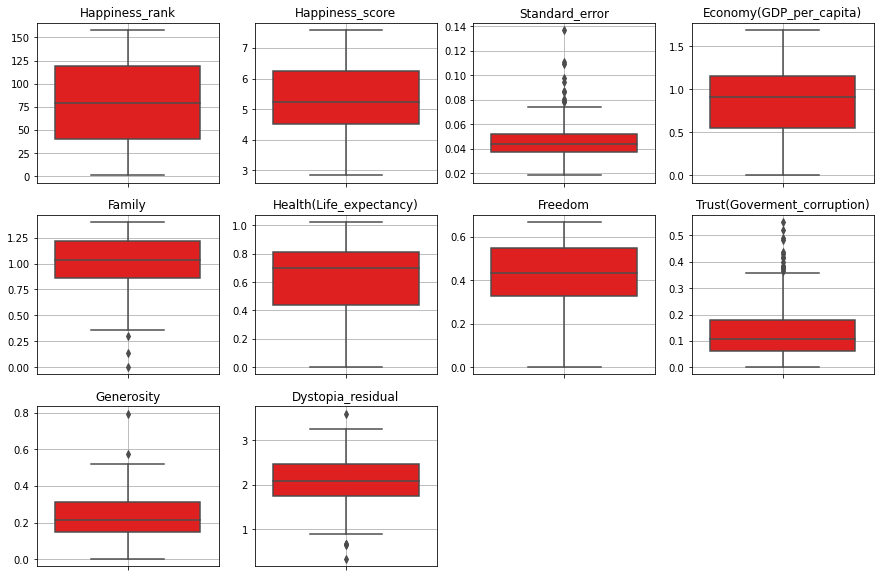

In [508]:
plt.rcParams["font.size"] = 10
plt.figure(figsize=(15,10))
for i in range(2, len(dfW.columns)):
    plt.subplot(3,4,i-1)
    sns.boxplot(y=dfW[dfW.columns[i]], color="red")
    plt.title(dfW.columns[i], color="black")
    plt.ylabel("")
    plt.rcParams["axes.axisbelow"] = True
    plt.grid(True)
    

#### Dari box plot, terlihat bahwa yang memiliki outliers hanyalah kolom Standard_error, Family, Trust(Goverment_corruption), Generosity, Dystopia_residual

#### Menggunakan winsorization untuk mengubah nilai outliers menjadi persentil terdekat

In [480]:
dfW["winz_Standard_error"] = winsorize(dfW["Standard_error"], (0,0.07))
dfW["winz_Family"] = winsorize(dfW["Family"], (0.02,0))
dfW["winz_Trust(Government_corruption)"] = winsorize(dfW["Trust(Goverment_corruption)"], (0,0.09))
dfW["winz_Generosity"] = winsorize(dfW["Generosity"], (0,0.02))
dfW["winz_Dystopia_residual"] = winsorize(dfW["Dystopia_residual"], (0.03,0.01))


In [481]:
dfW_Clean = dfW
dfW_Clean.drop(["Standard_error", "Family", "Trust(Goverment_corruption)", "Generosity", "Dystopia_residual"], axis=1, inplace=True, errors="ignore")

#### Perbandingan dimensi data sebelum dan setelah winsorization

In [482]:
print(f"Dimensi data life expectancy sebelum data cleaning: {158} baris x {12} kolom")
print(f"Dimensi data life expectancy setelah data cleaning: {dfW_Clean.shape[0]} baris x {dfW_Clean.shape[1]} kolom")

Dimensi data life expectancy sebelum data cleaning: 158 baris x 12 kolom
Dimensi data life expectancy setelah data cleaning: 158 baris x 12 kolom


#### Box plot setelah dilakukan winsorization

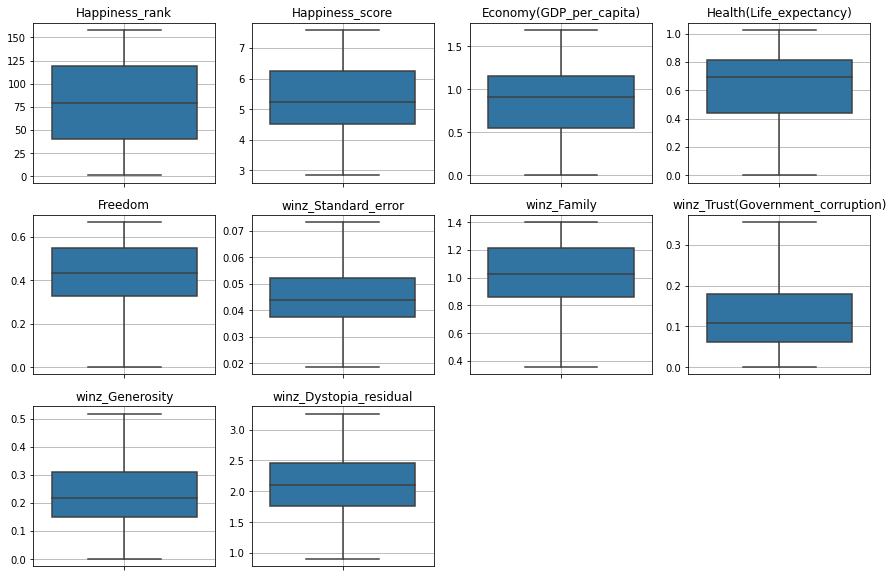

In [498]:
plt.rcParams["font.size"] = 10
plt.figure(figsize=(15,10))
for i in range(2, len(dfW_Clean.columns)):
    plt.subplot(3,4,i-1)
    sns.boxplot(y=dfW[dfW_Clean.columns[i]])
    plt.title(dfW_Clean.columns[i], color="black")
    plt.ylabel("")
    plt.grid(True)
    plt.rcParams["axes.axisbelow"] = True

# E. Statistik
****

## Sampel Data
****

In [484]:
dfW_Clean.head(5)

,Country,Region,Happiness_rank,Happiness_score,Economy(GDP_per_capita),Health(Life_expectancy),Freedom,winz_Standard_error,winz_Family,winz_Trust(Government_corruption),winz_Generosity,winz_Dystopia_residual
0,Switzerland,Western Europe,1,7.587,1.39651,0.94143,0.66557,0.03411,1.34951,0.35637,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,0.94784,0.62877,0.04884,1.40223,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,0.87464,0.64938,0.03328,1.36058,0.35637,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,0.88521,0.66973,0.03880,1.33095,0.35637,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,0.90563,0.63297,0.03553,1.32261,0.32957,0.45811,2.45176


## Statistik
****

In [485]:
dfW_Clean.describe()

,Happiness_rank,Happiness_score,Economy(GDP_per_capita),Health(Life_expectancy),Freedom,winz_Standard_error,winz_Family,winz_Trust(Government_corruption),winz_Generosity,winz_Dystopia_residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.846137,0.630259,0.428615,0.046433,0.994962,0.136812,0.235152,2.104883
std,45.754363,1.145010,0.403121,0.247078,0.150693,0.012843,0.260847,0.103646,0.119665,0.527224
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.018480,0.353860,0.000000,0.000000,0.899910
25%,40.250000,4.526000,0.545808,0.439185,0.328330,0.037268,0.856823,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.910245,0.696705,0.435515,0.043940,1.029510,0.107220,0.216130,2.095415
75%,118.750000,6.243750,1.158448,0.811013,0.549092,0.052300,1.214405,0.180255,0.309883,2.462415
max,158.000000,7.587000,1.690420,1.025250,0.669730,0.073310,1.402230,0.356370,0.517520,3.260010


# F. Visualisasi
****

## Histogram

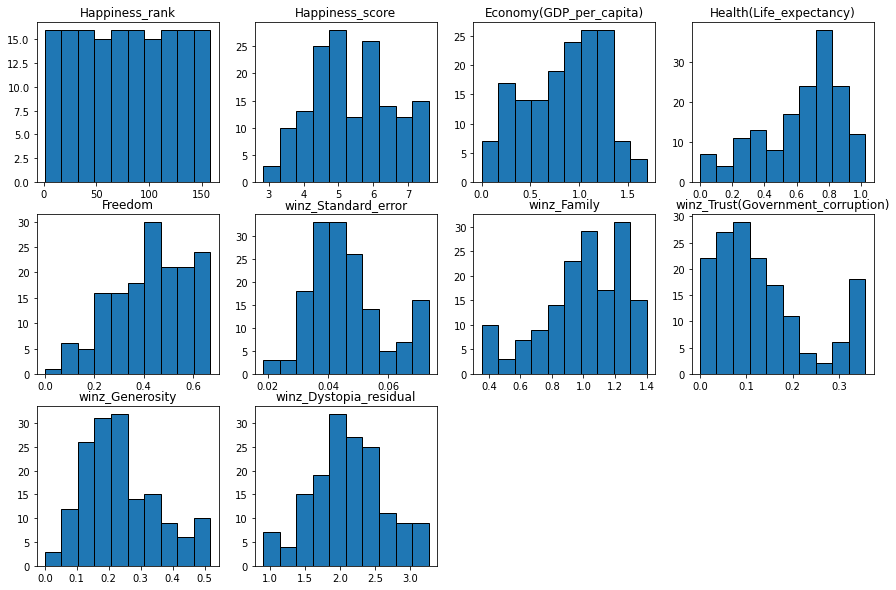

In [497]:
plt.rcParams["font.size"] = 10
plt.figure(figsize=(15,10))
for i in range(2, len(dfW_Clean.columns)):
    plt.subplot(3,4,i-1)
    plt.hist(dfW[dfW_Clean.columns[i]], edgecolor="black")
    plt.title(dfW_Clean.columns[i])

## Grafik

Text(0.5, 1.0, 'Ekonomi Berdasarkan Region')

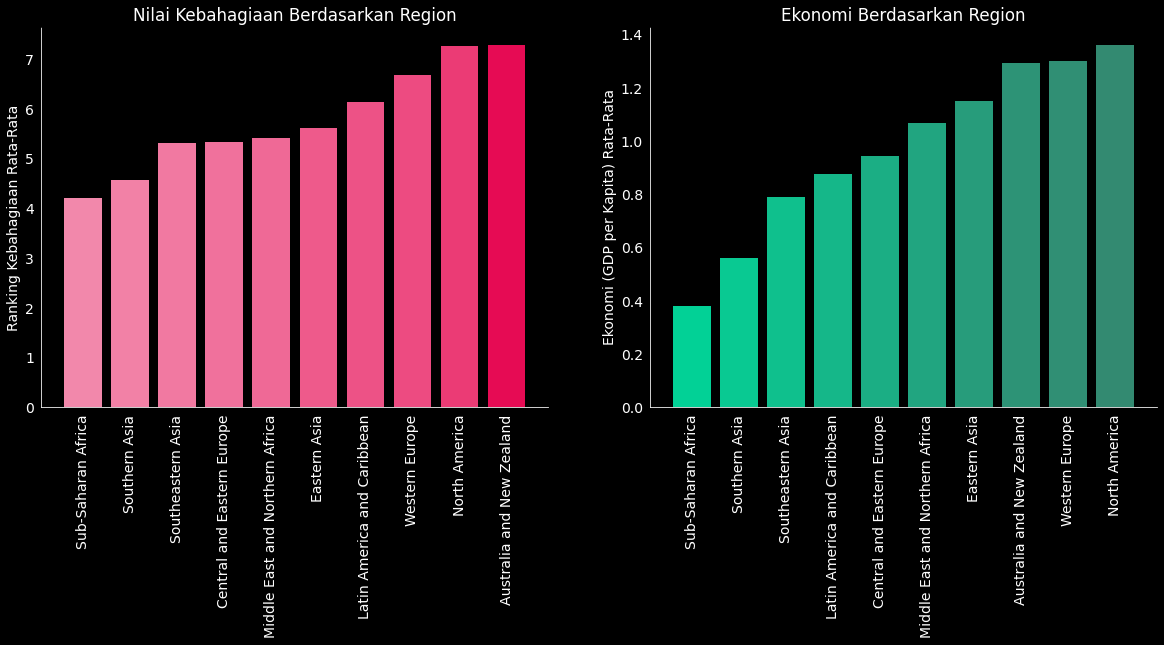

In [487]:
plt.rcParams["font.size"] = 14
plt.figure(figsize=(20,7), facecolor="black")

dfW_group_Region = dfW_Clean.groupby("Region")["Happiness_score"].mean()
dfW_group_Region.sort_values(ascending=True, inplace=True)
ax = plt.subplot(1,2,1)
ax.spines["left"].set(color="white")
ax.spines["bottom"].set(color="white")
ax.set(facecolor="black")
plt.bar(dfW_group_Region.index.values, height = dfW_group_Region, color=["#f288ab","#f281a6","#f179a1","#f0719c","#ef6996","#ee5a8b","#ed5286","#ed4b81","#eb3b75","#e60b54"]
)
plt.xticks(rotation=90, color="white")
plt.yticks(color="white")
plt.ylabel("Ranking Kebahagiaan Rata-Rata", color="white")
plt.title("Nilai Kebahagiaan Berdasarkan Region", color="white")


dfW_group_Region = dfW_Clean.groupby("Region")["Economy(GDP_per_capita)"].mean()
dfW_group_Region.sort_values(ascending=True, inplace=True)
ax = plt.subplot(1,2,2)
ax.spines["left"].set(color="white")
ax.spines["bottom"].set(color="white")
ax.set(facecolor="black")
plt.bar(dfW_group_Region.index.values, height = dfW_group_Region, color=["#02d196","#09c992","#0fc08d","#15b789","#1bae84","#21a580","#279c7b","#2d9376","#308f74","#338a71"])
plt.xticks(rotation=90, color="white")
plt.yticks(color="white")
plt.ylabel("Ekonomi (GDP per Kapita) Rata-Rata", color="white")
plt.title("Ekonomi Berdasarkan Region", color="white")

Text(0.5, 1.0, 'Nilai Kebahagiaan vs Nilai Ekonomi')

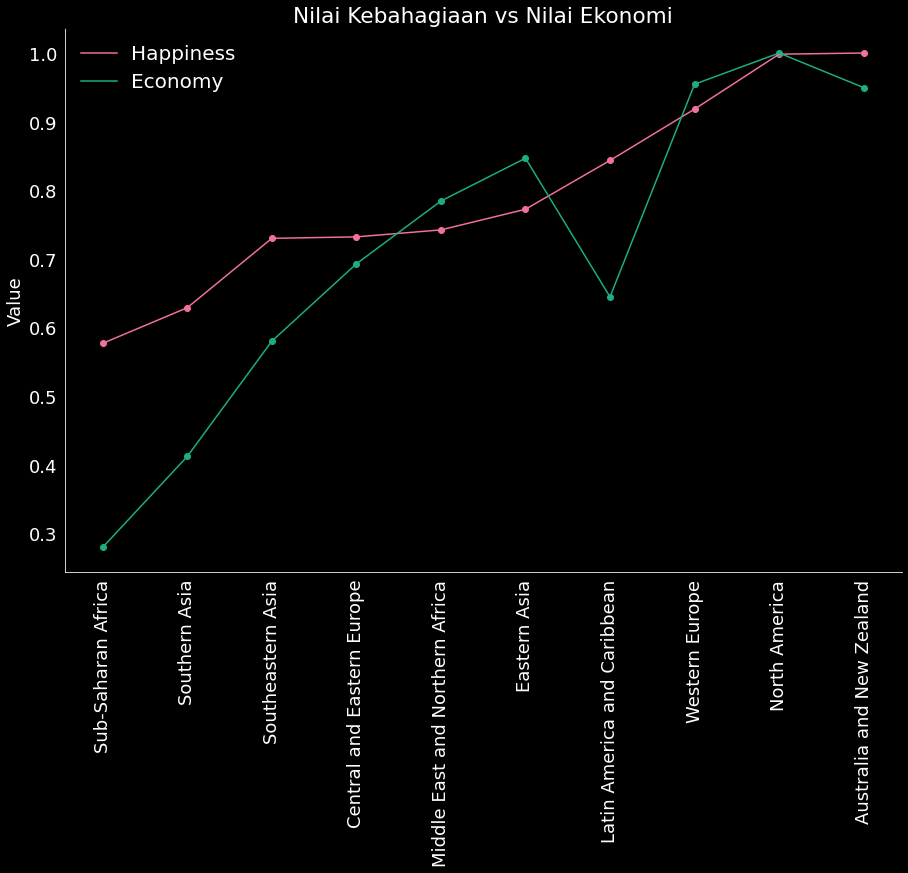

In [488]:
plt.rcParams["font.size"] = 18
plt.figure(figsize=(15,10), facecolor="black")

dfW_group_Region = dfW_Clean.groupby("Region")[["Happiness_score", "Economy(GDP_per_capita)"]].mean()
dfW_group_Region.sort_values(by="Happiness_score", ascending=True, inplace=True)
ax = plt.axes()
ax.spines["left"].set(color="white")
ax.spines["bottom"].set(color="white")
ax.set(facecolor="black")
happiness = plt.plot(dfW_group_Region["Happiness_score"]/dfW_group_Region["Happiness_score"].max(), color="#f0719c")
economy = plt.plot(dfW_group_Region["Economy(GDP_per_capita)"]/dfW_group_Region["Economy(GDP_per_capita)"].max(), color="#1bae84")
legend = plt.legend(["Happiness", "Economy"])
frame = legend.get_frame()
frame.set_facecolor("black")
frame.set_edgecolor("black")
for text in legend.get_texts():
    text.set(color="white", size=20)

plt.scatter(x=dfW_group_Region.index.values, y=dfW_group_Region["Happiness_score"].values/dfW_group_Region["Happiness_score"].max(), color="#f0719c")
plt.scatter(x=dfW_group_Region.index.values, y=dfW_group_Region["Economy(GDP_per_capita)"].values/dfW_group_Region["Economy(GDP_per_capita)"].max(), color="#1bae84")
plt.xticks(rotation=90, color="white")
plt.yticks(color="white")
plt.ylabel("Value", color="white")


plt.title("Nilai Kebahagiaan vs Nilai Ekonomi", color="white")




In [489]:
happy_countries = dfW_Clean[dfW_Clean["Happiness_score"] >= 6.5]
happy_countries["Region"].value_counts()

Western Europe                     14
Latin America and Caribbean         7
Middle East and Northern Africa     4
Australia and New Zealand           2
North America                       2
Southeastern Asia                   1
Central and Eastern Europe          1
Name: Region, dtype: int64

In [490]:
sad_countries = dfW_Clean[dfW_Clean["Happiness_score"] < 4.5]
sad_by_region = sad_countries["Region"].value_counts()
sad_by_region

Sub-Saharan Africa                 25
Central and Eastern Europe          3
Middle East and Northern Africa     3
Southeastern Asia                   2
Southern Asia                       2
Name: Region, dtype: int64

Text(0.5, 1.0, 'Distribusi Negara Paling Tidak Bahagia')

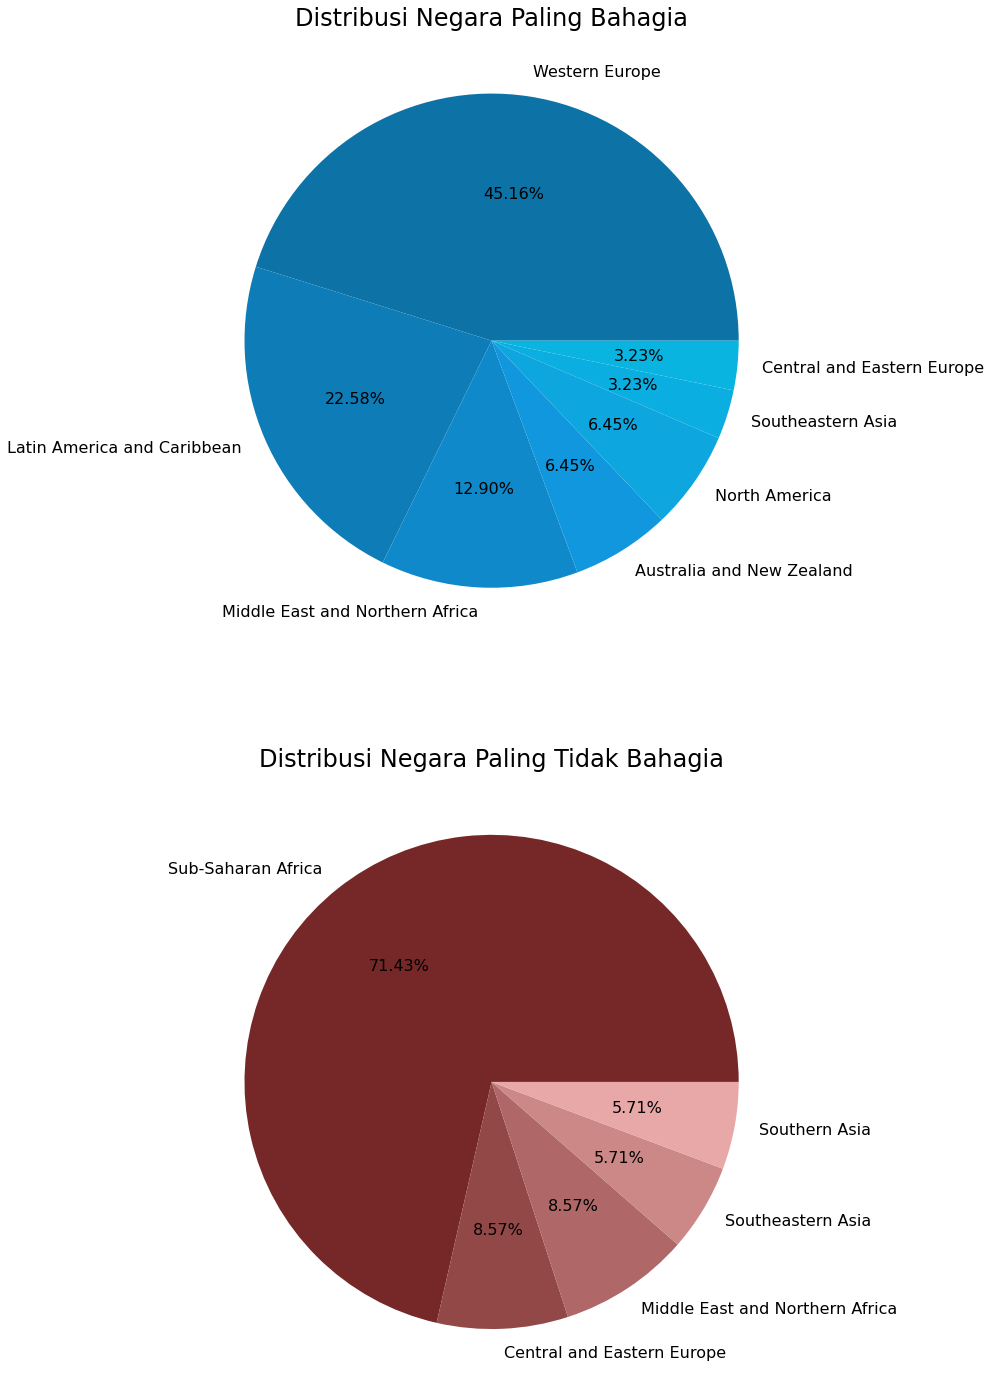

In [491]:
plt.rcParams["font.size"] = 16
plt.figure(figsize=(15,25))

plt.subplot(2,1,1)
_, _, pie = plt.pie(happy_countries["Region"].value_counts(), autopct="%.2f%%", labels=happy_countries["Region"].value_counts().index.values, colors=["#0d72a6","#0e7db7","#0f89c9","#1197dd","#0da6df","#0baee0","#09b5e0"], textprops={'color':"black"})

plt.title("Distribusi Negara Paling Bahagia", size=24)


plt.subplot(2,1,2)
_, _, pie = plt.pie(sad_countries["Region"].value_counts(), autopct="%.2f%%", labels=sad_countries["Region"].value_counts().index.values, colors=["#752827","#924847","#af6867","#cc8887","#e8a8a7"], textprops={'color':"black"})

plt.title("Distribusi Negara Paling Tidak Bahagia", size=24)

# G. Korelasi

## Heatmap

<AxesSubplot:>

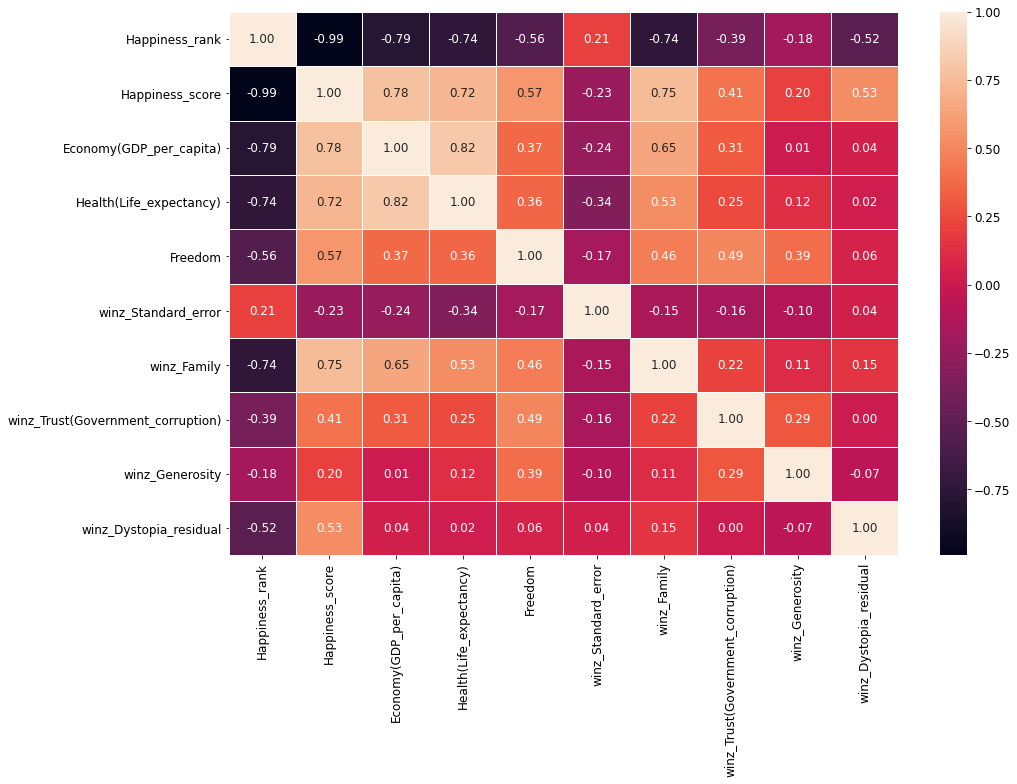

In [492]:
plt.rcParams["font.size"] = 12
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(dfW.corr(), annot=True, linewidths=0.5, fmt=".2f", ax=ax)

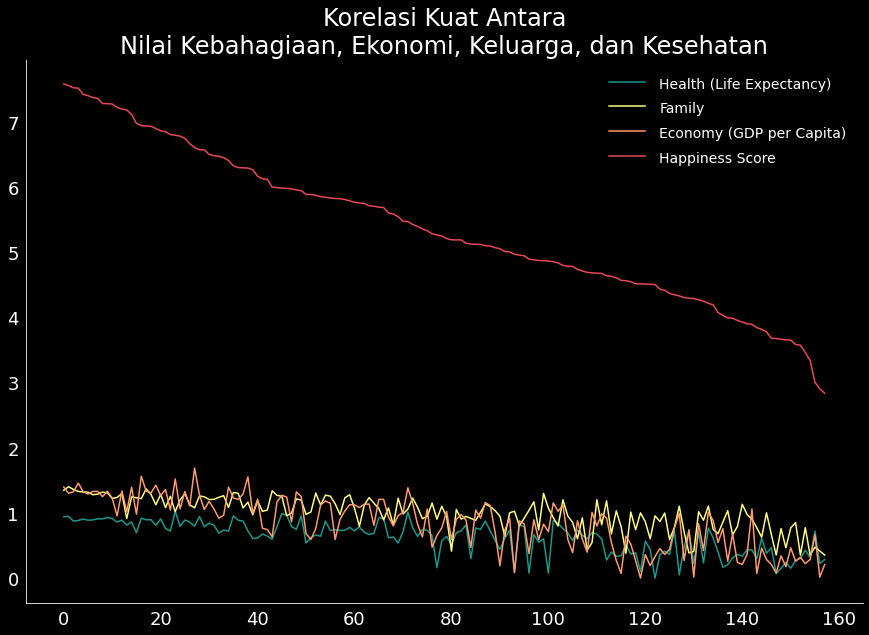

In [493]:
plt.rcParams["font.size"] = 18
plt.figure(figsize=(15,10), facecolor="black")

ax = plt.axes()
ax.spines["left"].set(color="white")
ax.spines["bottom"].set(color="white")

ax.set(facecolor="black")
data_plot = dfW.loc[:,["Health(Life_expectancy)","winz_Family", "Economy(GDP_per_capita)","Happiness_score" ]]
plt.plot(data_plot["Health(Life_expectancy)"], color="#1b998b")
plt.plot(data_plot["winz_Family"], color="#fffd82")
plt.plot(data_plot["Economy(GDP_per_capita)"], color="#ff9b71")
plt.plot(data_plot["Happiness_score"], color="#eb4855")

plt.xticks(color="white")
plt.yticks(color="white")
plt.title("Korelasi Kuat Antara\nNilai Kebahagiaan, Ekonomi, Keluarga, dan Kesehatan", color="white", size=24)
legend = plt.legend(["Health (Life Expectancy)", "Family", "Economy (GDP per Capita)", "Happiness Score"], loc="upper right")

frame = legend.get_frame()
frame.set_facecolor("black")
frame.set_edgecolor("black")
for text in legend.get_texts():
    text.set(color="white", size=14)


Text(0.5, 0, 'Happiness Score')

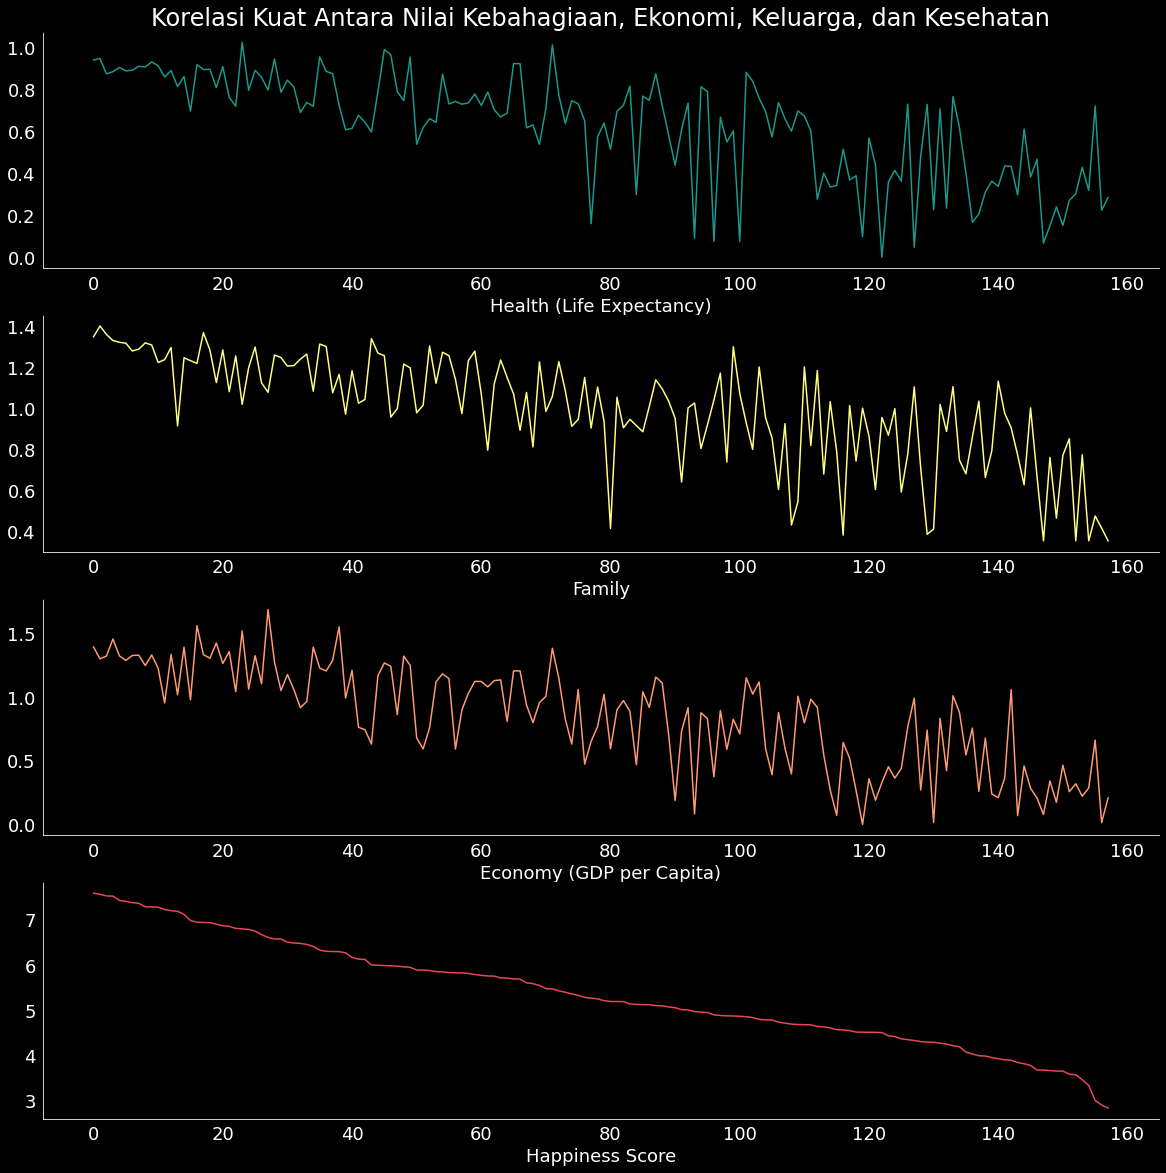

In [494]:
plt.rcParams["font.size"] = 18
plt.figure(figsize=(20,20), facecolor="black")



ax = plt.subplot(4,1,1)
ax.spines["left"].set(color="white")
ax.spines["bottom"].set(color="white")
ax.set(facecolor="black")
plt.plot(data_plot["Health(Life_expectancy)"], color="#1b998b")
plt.xticks(color="white")
plt.yticks(color="white")
plt.xlabel("Health (Life Expectancy)", color="white")
plt.title("Korelasi Kuat Antara Nilai Kebahagiaan, Ekonomi, Keluarga, dan Kesehatan", color="white", size=24)
ax = plt.subplot(4,1,2)
ax.spines["left"].set(color="white")
ax.spines["bottom"].set(color="white")
ax.set(facecolor="black")
plt.plot(data_plot["winz_Family"], color="#fffd82")
plt.xticks(color="white")
plt.yticks(color="white")
plt.xlabel("Family", color="white")

ax = plt.subplot(4,1,3)
ax.spines["left"].set(color="white")
ax.spines["bottom"].set(color="white")
ax.set(facecolor="black")
plt.plot(data_plot["Economy(GDP_per_capita)"], color="#ff9b71")
plt.xticks(color="white")
plt.yticks(color="white")
plt.xlabel("Economy (GDP per Capita)", color="white")

ax = plt.subplot(4,1,4)
ax.spines["left"].set(color="white")
ax.spines["bottom"].set(color="white")
ax.set(facecolor="black")
plt.plot(data_plot["Happiness_score"], color="#e84855")
plt.xticks(color="white")
plt.yticks(color="white")
plt.xlabel("Happiness Score", color="white")

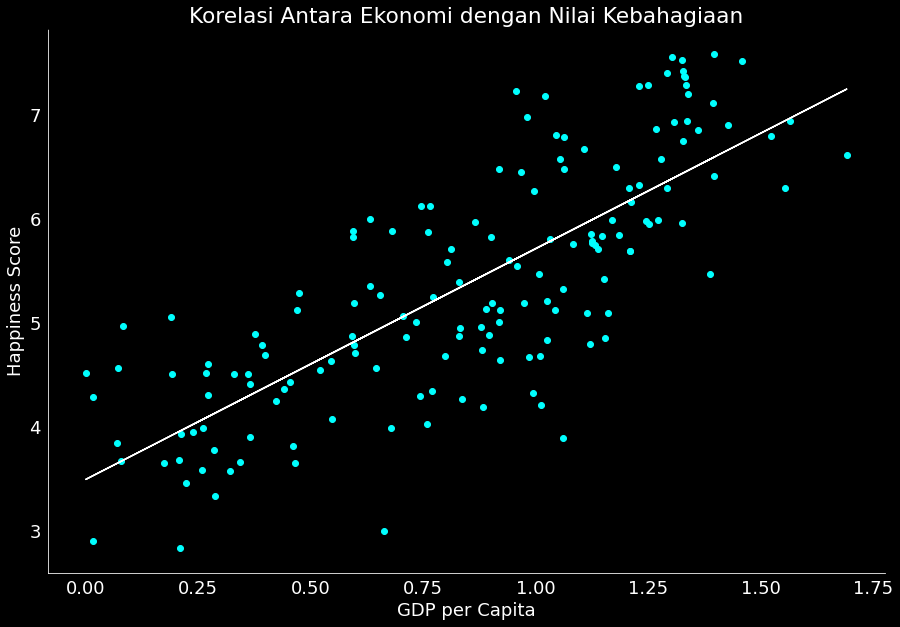

In [495]:
plt.rcParams["font.size"] = 18
plt.figure(figsize=(15,10), facecolor="black")

ax = plt.axes()
ax.spines["left"].set(color="white")
ax.spines["bottom"].set(color="white")

ax.set(facecolor="black")

plt.scatter(dfW_Clean["Economy(GDP_per_capita)"], dfW_Clean["Happiness_score"], color="aqua")
plt.xticks(color="white")
plt.yticks(color="white")
plt.xlabel("GDP per Capita", color="white")
plt.ylabel("Happiness Score", color="white")
plt.title("Korelasi Antara Ekonomi dengan Nilai Kebahagiaan", color="white")

m,b = np.polyfit(dfW_Clean["Economy(GDP_per_capita)"], dfW_Clean["Happiness_score"], 1)
plt.plot(dfW_Clean["Economy(GDP_per_capita)"], m*dfW_Clean["Economy(GDP_per_capita)"]+b, color="white")